In [1]:
!conda list

# packages in environment at /opt/anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
alabaster                 0.7.12                   py37_0  
anaconda                  2020.02                  py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.12                   py37_0  
anaconda-project          0.8.4                      py_0  
applaunchservices         0.2.1                      py_0  
appnope                   0.1.0                    py37_0  
appscript                 1.1.0            py37h1de35cc_0  
argh                      0.26.2                   py37_0  
asn1crypto                1.3.0                    py37_0  
astroid                   2.3.3                    py37_0  
astropy                   4.0              py37h1de35cc_0  
atomicwrites              1.3.0                    py37_1  
attrs                     19.3.0              

In [3]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimensions: (658, 990, 3)


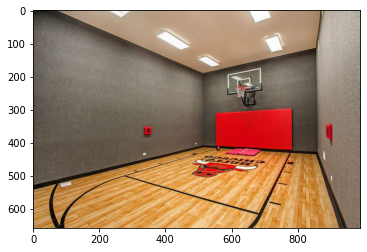

In [4]:
#reading in an image
image = mpimg.imread('test_images/1.jpg')
# RGB

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Image Color Representation 

In [6]:
image[:,:,0].shape

(658, 990)

In [7]:
image[0,0,:]

array([15, 14,  9], dtype=uint8)

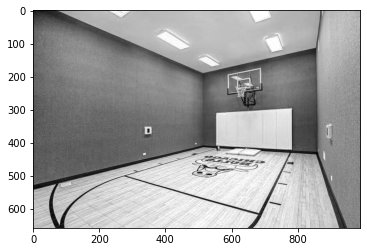

In [8]:
plt.imshow(image[:,:,0], cmap='gray')

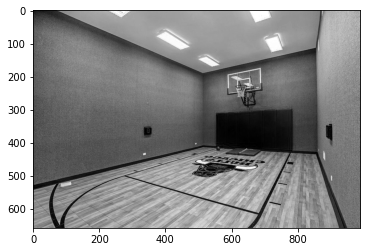

In [12]:
plt.imshow(image[:,:,1], cmap='gray')

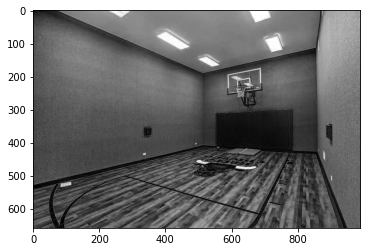

In [10]:
plt.imshow(image[:,:,2], cmap='gray')

In [16]:
png = mpimg.imread("test_images/cock.png")

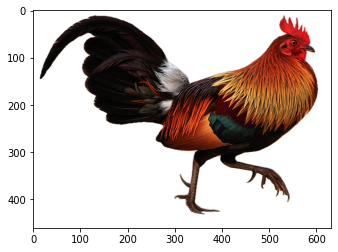

In [19]:
plt.imshow(png)


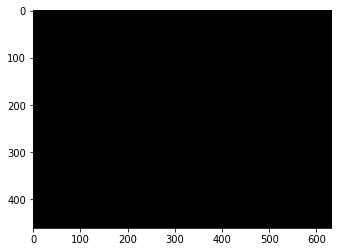

In [20]:
plt.imshow(png[:,:,3], cmap='gray')

In [ ]:
png.max()

In [21]:
png[100:300,300:500,3] = 0.3

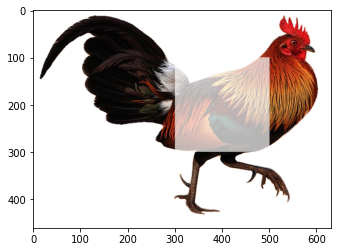

In [22]:
plt.imshow(png)

In [ ]:
plt.imshow(png[:,:,:3])

In [23]:
png2 = cv2.imread("test_images/cock.png")

In [24]:
png2.shape

(461, 632, 3)

In [ ]:
plt.imshow(png2)
# BGR

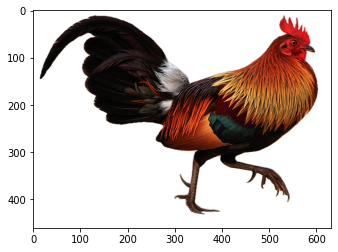

In [25]:
cock_RGB = cv2.cvtColor(png2, cv2.COLOR_BGR2RGB)

plt.imshow(cock_RGB)


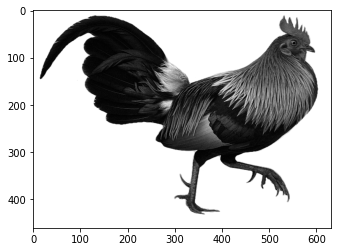

In [26]:
cock_gray = cv2.cvtColor(png2, cv2.COLOR_BGR2GRAY)

plt.imshow(cock_gray, cmap='gray')



In [27]:
cock_gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## Binarize

In [30]:
gradient = mpimg.imread('test_images/gradient.png')

gradient_gray = cv2.cvtColor(gradient, cv2.COLOR_BGR2GRAY)


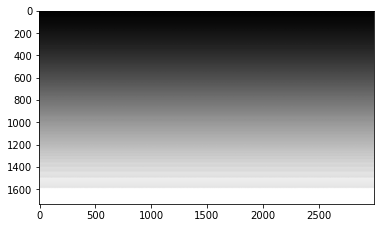

In [31]:
plt.imshow(gradient_gray, cmap='gray')


In [35]:
gradient_gray = (gradient_gray*255).astype(np.uint8)

In [36]:
ret,binary1 = cv2.threshold(gradient_gray,127,255,cv2.THRESH_BINARY)

In [39]:
np_test = gradient_gray.copy()

In [40]:
np_test[np.where(gradient_gray>127)] = 255

In [41]:
np_test[np.where(gradient_gray<=127)] = 0

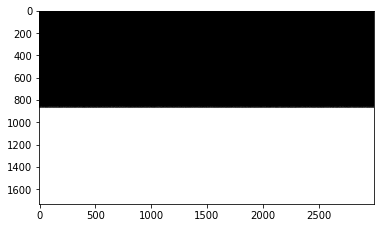

In [42]:
plt.imshow(np_test, cmap='gray')


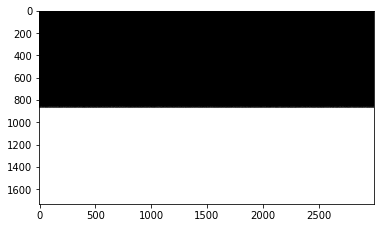

In [38]:
plt.imshow(binary1, cmap='gray')



## Coordinate System

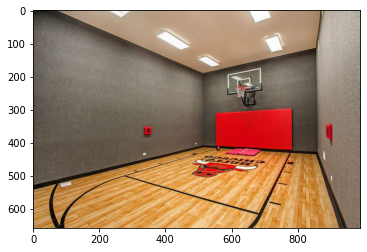

In [44]:
plt.imshow(image)

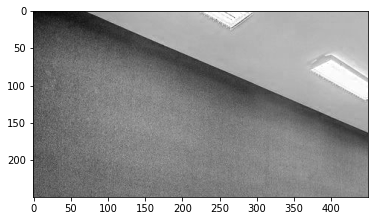

In [45]:
plt.imshow(image[0:250,0:450,0], cmap='gray')

In [49]:
image.shape

(658, 990, 3)

In [ ]:
png.shape

## Image Blending

In [47]:
img_resized = cv2.resize(image, (300, 400))

In [48]:
img_resized.shape

(400, 300, 3)

In [51]:
nyc = mpimg.imread('test_images/nyc.png')


In [53]:
love_nyc = mpimg.imread('test_images/I_Love_New_York.png')


In [61]:
love_nyc[:,:,3].max()

1.0

In [55]:
nyc.shape

(765, 1800, 3)

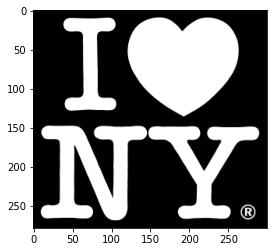

In [58]:
plt.imshow(love_nyc[:,:,3], cmap="gray")

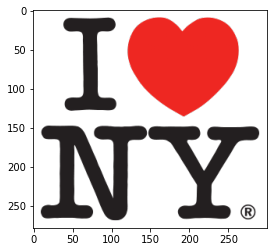

In [54]:
plt.imshow(love_nyc)

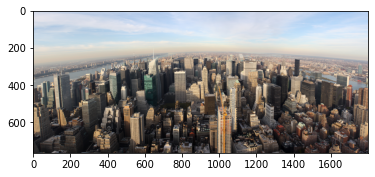

In [52]:
plt.imshow(nyc)

In [59]:
res = nyc.copy()

In [64]:
mask = np.zeros((279,300,3))
mask[:,:,0] = love_nyc[:,:,3]
mask[:,:,1] = love_nyc[:,:,3]
mask[:,:,2] = love_nyc[:,:,3]

In [65]:
res[242:242+279, 750:750+300, :] = (1-mask) * res[242:242+279, 750:750+300, :] + mask*love_nyc[:,:,0:3]

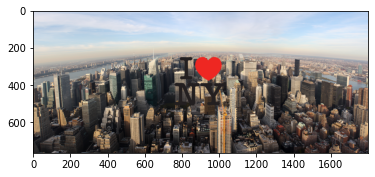

In [66]:
plt.imshow(res)

## Filters

In [ ]:
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)